SOM2用にSOMの関数化を行う  
import numpy as np  
numpy はインポートしてね

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#SOM人工データ
x = np.arange(-3, 3, 0.1)
n = len(x)

y = np.sin(x)

X = np.stack([x, y], 1)
len(X)

60

In [199]:
#ノード設定
K = 50
l = 1
zeta = np.linspace(-1,1,K)
zeta = np.reshape(zeta, (K,1))  #縦にしておきたい

In [200]:
#潜在変数の初期化
zn = np.random.rand(n)
zn = np.reshape(zn, (n,1)) #縦にしておきたい

In [201]:
#学習率初期設定
h_kn = np.zeros((n,K))
#np.size(h_kn,axis=0)

In [202]:
#ノード毎学習率合計変数の初期設定
g_k = np.zeros((K))
g_k = np.reshape(g_k,(K,1))

In [203]:
#参照ベクトル計算の中で使う変数の初期設定
h_X = np.zeros((n,2))

In [204]:
#参照ベクトル初期設定
y_k = np.zeros((K,2))

In [205]:
#潜在変数計算の中で使う
#xn_yk = np.zeros((K))

In [206]:
#潜在変数初期設定
k_n = np.zeros((n))
k_n = np.reshape(k_n, (n,1))

In [257]:
#epoch
T = 70

#近傍半径の設定
sig_zero = 1.0
sig_min = 0.05
Tau = 50.0
sig = 0
sig_t = []

#for sig > sig_min:
for t in range(T):
    sig_max = sig_zero-(sig_zero-sig_min) * t / Tau
    if sig_max > sig_min:
        sig = sig_max
    else:
        sig = sig_min
    sig_t.append(sig)
    sig_zero = sig_max

In [263]:
len(sig_t)

70

In [258]:

fig = plt.figure()
ims = []

for time in range(T):
    for data in range(n):
        for node in range(K):
            h_kn[data][node] = np.exp( -1 / (2*np.power(sig_t[time], 2)) * np.power(zn[data]-zeta[node],2))
    
    for node in range(K):
        g_k[node] = np.sum(h_kn[:,node])
    
    for node in range(K):
        for data in range(n):
            h_X[data] = h_kn[data][node]*X[data]
        y_k[node] = 1/g_k[node] * np.sum(h_X,axis=0)
    
    for data in range(n):
        xn_yk_min = np.power(X[data][0] - y_k[0][0], 2) + np.power(X[data][1] - y_k[0][1], 2)
        Nd = 0
        for node in range(1,K):
            xn_yk = np.power(X[data][0] - y_k[node][0], 2) + np.power(X[data][1] - y_k[node][1], 2)
            if xn_yk_min > xn_yk:
                xn_yk_min = xn_yk
                Nd = node
        k_n[data] = Nd
        
    for data in range(n):
        zn[data] = zeta[int(k_n[data])]    
    #print(time)
    #im = plt.plot(y_k[:,0],y_k[:,1])
    #ims.append(im)
    
#print(h_kn)
#print(g_k)
#print(y_k)
#print(k_n)

<Figure size 432x288 with 0 Axes>

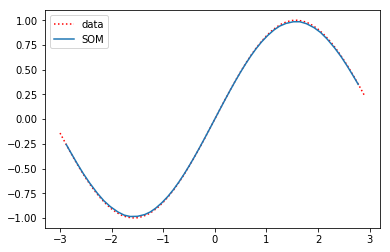

In [259]:
#ani = animation.ArtistAnimation(fig, ims, interval = 100)
plt.plot(x, y,'r:',label = "data")
plt.plot(y_k[:,0],y_k[:,1], label = "SOM")
plt.legend()
plt.show()

関数の作り方

In [35]:
def add(x,y):
    print(x+y)

In [36]:
add(3 ,5)

8


In [37]:
def add(x ,y):
    ans = x + y
    return ans

In [38]:
n = add(3 ,5)
n

8

In [40]:
n = np.size(X, axis = 0)
n

60

In [41]:
def SOM(X):
    n = np.size(X, axis = 0)
    
    #近傍半径の設定
    sig_zero = 1.0
    sig_min = 0.05
    Tau = 50.0
    sig = 0
    sig_t = []

    #for sig > sig_min:
    for t in range(n):
        sig_max = sig_zero-(sig_zero-sig_min) * t / Tau
        if sig_max > sig_min:
            sig = sig_max
        else:
            sig = sig_min
        sig_t.append(sig)
        sig_zero = sig_max

    #ノード設定
    K = 50
    l = 1
    zeta = np.linspace(-1,1,K)
    zeta = np.reshape(zeta, (K,1))  #縦にしておきたい

    #潜在変数の初期化
    zn = np.random.rand(n)
    zn = np.reshape(zn, (n,1)) #縦にしておきたい

    #学習率初期設定
    h_kn = np.zeros((n,K))
    #np.size(h_kn,axis=0)

    #ノード毎学習率合計変数の初期設定
    g_k = np.zeros((K))
    g_k = np.reshape(g_k,(K,1))

    #参照ベクトル計算の中で使う変数の初期設定
    h_X = np.zeros((n,2))

    #参照ベクトル初期設定
    y_k = np.zeros((K,2))

    #潜在変数計算の中で使う
    xn_yk = np.zeros((K))

    #潜在変数初期設定
    k_n = np.zeros((n))
    k_n = np.reshape(k_n, (n,1))

    T = 60
    fig = plt.figure()
    ims = []

    for time in range(T):
        for data in range(n):
            for node in range(K):
                h_kn[data][node] = np.exp( -1 / (2*np.power(sig_t[time], 2)) * np.power(zn[data]-zeta[node],2))

        for node in range(K):
            g_k[node] = np.sum(h_kn[:,node])

        for node in range(K):
            for data in range(n):
                h_X[data] = h_kn[data][node]*X[data]
            y_k[node] = 1/g_k[node] * np.sum(h_X,axis=0)

        for data in range(n):
            xn_yk_min = np.power(X[data][0] - y_k[0][0], 2) + np.power(X[data][1] - y_k[0][1], 2)
            Nd = 0
            for node in range(1,K):
                xn_yk = np.power(X[data][0] - y_k[node][0], 2) + np.power(X[data][1] - y_k[node][1], 2)
                if xn_yk_min > xn_yk:
                    xn_yk_min = xn_yk
                    Nd = node
            k_n[data] = Nd

        for data in range(n):
            zn[data] = zeta[int(k_n[data])]    
            
    return y_k

In [42]:
y_k = SOM(X)

<Figure size 432x288 with 0 Axes>

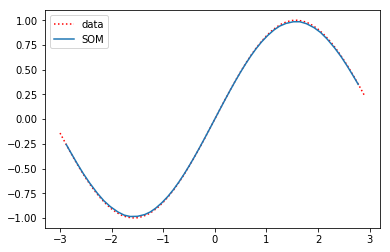

In [43]:
#ani = animation.ArtistAnimation(fig, ims, interval = 100)
plt.plot(x, y,'r:',label = "data")
plt.plot(y_k[:,0],y_k[:,1], label = "SOM")
plt.legend()
plt.show()

In [46]:
y_k = np.loadtxt("data1.txt")

In [87]:
Y=[]
Y.append(y_k[0])
Y.append(y_k[1])
Y

[array([-1.41563962, -1.43136825]), array([-1.73724228, -1.66246434])]

In [60]:
Y2=[]
Y2.extend(y_k[0])
Y2.extend(y_k[1])
Y2

[-1.41563961742582, -1.43136825164061, -1.73724228373245, -1.66246433580369]

In [95]:
y_k.flatten()

array([-1.41563962, -1.43136825, -1.73724228, -1.66246434, -1.858045  ,
       -0.82161436, -0.75274065, -2.24195132, -1.72765216, -0.84762343,
       -1.45068175, -1.17775457, -0.83158783, -1.85565667, -1.54341245,
       -1.29835997, -2.07367541, -0.48941027, -1.98338758, -0.69624346,
       -1.76956623, -1.0231239 , -1.52431139, -1.83289514, -1.61070219,
       -1.35235595, -2.04221954, -0.58674887, -2.00541067, -0.72211807,
       -0.61879397, -2.15144682, -2.09480001, -0.47037368, -1.6373207 ,
       -1.51807748, -1.3676448 , -1.25364737, -1.52017051, -1.22873109,
       -1.40340714, -1.52224028, -1.4550898 , -1.13661169, -1.560612  ,
       -1.36054687, -1.62543933, -2.2767493 , -1.50614759, -1.91853528,
       -1.07625859, -1.96653757, -0.87886261, -2.46247976, -1.34882013,
       -2.41568875, -1.14104278, -1.57971415, -1.80459488, -1.24941003,
       -1.83339199, -1.31532157, -1.26661297, -2.01638979, -2.09392918,
       -0.48151858, -1.41286613, -1.68613987, -1.78417462, -1.28

In [83]:
Y3 = np.zeros((2))
print(Y3)
#Y3 = np.stack([y_k[0] ,y_k[1]] ,0)
Y3 = np.stack([Y3 ,y_k[0]] ,0)
Y3 = np.stack([Y3 ,y_k[1]] ,0)
Y3

[0. 0.]


ValueError: all input arrays must have the same shape

In [51]:
num = 1
print("a"+str(num))

a1


SOM クラス化

In [12]:
class SOM_1:
    
    def __init__(self,
                 
        #近傍半径の設定
        sig_zero = 1.0,
        sig_min = 0.05,
        Tau = 50.0,
        
        #ノード設定
        K = 50,
        D = 1):
        
        self.K = K
        self.D = D
        
        #近傍半径の設定
        self.sig_zero = sig_zero
        self.sig_min = sig_min
        self.Tau = Tau

    def initialize(self ,X):
        self.n = np.size(X ,axis = 0)
        self.m = np.size(X ,axis = 1)
        self.X = X
        print(self.n)
        print(self.K)
        
        #潜在変数の初期化
        zn = np.random.rand(self.n)
        zn = np.reshape(zn, (self.n,1)) #縦にしておきたい
        self.zn = zn
        
        #ノード設定
        zeta = np.linspace(-1 ,1 ,self.K)
        zeta = np.reshape(zeta ,(self.K ,self.D))  #縦にしておきたい
        self.zeta = zeta

        #学習率初期設定
        h_kn = np.zeros((self.n ,self.K))
        self.h_kn = h_kn

        #ノード毎学習率合計変数の初期設定
        g_k = np.zeros((self.K))
        g_k = np.reshape(g_k ,(self.K ,self.D))
        self.g_k = g_k

        #参照ベクトル計算の中で使う変数の初期設定
        h_X = np.zeros((self.n ,self.m))
        self.h_X = h_X

        #参照ベクトル初期設定
        y_k = np.zeros((self.K ,self.m))
        self.y_k = y_k

        #潜在変数初期設定
        k_n = np.zeros((self.n))
        k_n = np.reshape(k_n ,(self.n ,self.D))
        self.k_n = k_n
    
    def sig(self, T):
        #近傍半径の設定   
        sig = 0
        sig_t_s = np.zeros((T))
        #for sig > sig_min:
        for t in range(T):
            sig_max = self.sig_zero-(self.sig_zero - self.sig_min) * t / self.Tau
            if sig_max > self.sig_min:
                sig = sig_max
            else:
                sig = self.sig_min
            sig_t_s[t] = sig
            self.sig_zero = sig_max
        self.sig_t = sig_t_s

    def fit(self, T):
        self.sig(T)
        print(self.sig_t)
        for time in range(T):
            for data in range(self.n):
                for node in range(self.K):
                    self.h_kn[data][node] = np.exp( -1 / (2*np.power(self.sig_t[time], 2)) * np.power(self.zn[data] - self.zeta[node],2))

            for node in range(self.K):
                self.g_k[node] = np.sum(self.h_kn[:,node])

            for node in range(self.K):
                for data in range(self.n):
                    self.h_X[data] = self.h_kn[data][node] * self.X[data]
                self.y_k[node] = 1/self.g_k[node] * np.sum(self.h_X ,axis=0)

            for data in range(self.n):
                xn_yk_min = np.power(self.X[data][0] - self.y_k[0][0], 2) + np.power(self.X[data][1] - self.y_k[0][1], 2)
                Nd = 0
                for node in range(1 ,self.K):
                    xn_yk = np.power(self.X[data][0] - self.y_k[node][0], 2) + np.power(self.X[data][1] - self.y_k[node][1], 2)
                    if xn_yk_min > xn_yk:
                        xn_yk_min = xn_yk
                        Nd = node
                self.k_n[data] = Nd

            for data in range(self.n):
                self.zn[data] = self.zeta[int(self.k_n[data])]    


In [20]:
som = SOM()

In [21]:
som.initialize(X)

60
100
2


In [22]:
som.fit(70)

60
[1.         0.981      0.94376    0.8901344  0.82292365 0.74563128
 0.66215553 0.57645376 0.49222115 0.41262135 0.34009708 0.27627572
 0.22196955 0.17725747 0.14162537 0.11413776 0.09361368 0.07878503
 0.06842242 0.0614219  0.05685314 0.05397482 0.0522259  0.05120199
 0.05062503 0.05031252 0.05015001 0.050069   0.05003036 0.05001275
 0.0500051  0.05000194 0.0500007  0.05000024 0.05000008 0.05000002
 0.05000001 0.05       0.05       0.05       0.05       0.05
 0.05       0.05       0.05       0.05       0.05       0.05
 0.05       0.05       0.05       0.05       0.05       0.05
 0.05       0.05       0.05       0.05       0.05       0.05
 0.05       0.05       0.05       0.05       0.05       0.05
 0.05       0.05       0.05       0.05      ]


C:\Users\admin.H118\Anaconda3\lib\site-packages\ipykernel_launcher.py:101: RuntimeWarning: invalid value encountered in multiply
C:\Users\admin.H118\Anaconda3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: overflow encountered in multiply


In [16]:
np.size(som.y_k ,axis = 1)

2

In [17]:
som_2 = SOM()
som_2.initialize(X)
som_2.fit(1)
som_2.y_k

60
100
2
60
[1.]


array([[ 1.86384726e-01,  7.26185645e-02],
       [ 1.55215274e-01,  6.29798721e-02],
       [ 1.23603467e-01,  5.33593563e-02],
       [ 9.16944638e-02,  4.38119430e-02],
       [ 5.96435726e-02,  3.43945917e-02],
       [ 2.76138316e-02,  2.51653177e-02],
       [-4.22675978e-03,  1.61821304e-02],
       [-3.57082623e-02,  7.50192438e-03],
       [-6.66619673e-02, -8.20635293e-04],
       [-9.69235989e-02, -8.73419154e-03],
       [ 1.67254206e-01,  6.17686016e-02],
       [ 1.36823842e-01,  5.26770858e-02],
       [ 1.05935036e-01,  4.35732220e-02],
       [ 7.47311337e-02,  3.45091659e-02],
       [ 4.33656816e-02,  2.55393332e-02],
       [ 1.20000240e-02,  1.67194750e-02],
       [-1.91994482e-02,  8.10566346e-03],
       [-5.00643028e-02, -2.46775257e-04],
       [-8.04272248e-02, -8.28434461e-03],
       [-1.10125207e-01, -1.59564337e-02],
       [ 1.47702921e-01,  5.08643048e-02],
       [ 1.18008086e-01,  4.22907752e-02],
       [ 8.78402400e-02,  3.36743810e-02],
       [ 5.

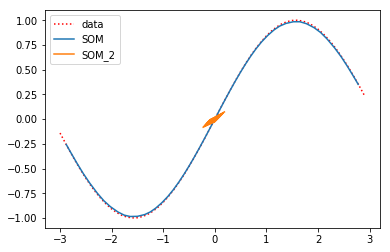

In [18]:
#ani = animation.ArtistAnimation(fig, ims, interval = 100)
plt.plot(X[:,0], X[:,1],'r:',label = "data")
plt.plot(som.y_k[:,0],som.y_k[:,1], label = "SOM")
plt.plot(som_2.y_k[:,0],som_2.y_k[:,1], label = "SOM_2")
plt.legend()
plt.show()

In [316]:
file = 2
som = []

for file_num in range(file):
    som.append(SOM())

In [317]:
som[0].initialize(X)
som[0].fit(10)
som[1].initialize(X)
som[1].fit(70)

60
50
[1.         0.981      0.94376    0.8901344  0.82292365 0.74563128
 0.66215553 0.57645376 0.49222115 0.41262135]
60
50
[1.         0.981      0.94376    0.8901344  0.82292365 0.74563128
 0.66215553 0.57645376 0.49222115 0.41262135 0.34009708 0.27627572
 0.22196955 0.17725747 0.14162537 0.11413776 0.09361368 0.07878503
 0.06842242 0.0614219  0.05685314 0.05397482 0.0522259  0.05120199
 0.05062503 0.05031252 0.05015001 0.050069   0.05003036 0.05001275
 0.0500051  0.05000194 0.0500007  0.05000024 0.05000008 0.05000002
 0.05000001 0.05       0.05       0.05       0.05       0.05
 0.05       0.05       0.05       0.05       0.05       0.05
 0.05       0.05       0.05       0.05       0.05       0.05
 0.05       0.05       0.05       0.05       0.05       0.05
 0.05       0.05       0.05       0.05       0.05       0.05
 0.05       0.05       0.05       0.05      ]


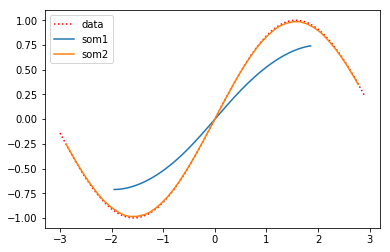

In [318]:
#ani = animation.ArtistAnimation(fig, ims, interval = 100)
plt.plot(x, y,'r:',label = "data")
plt.plot(som[0].y_k[:,0],som[0].y_k[:,1], label = "som1")
plt.plot(som[1].y_k[:,0],som[1].y_k[:,1], label = "som2")
plt.legend()
plt.show()

In [352]:
np.linspace(1 ,-1 ,10)

array([ 1.        ,  0.77777778,  0.55555556,  0.33333333,  0.11111111,
       -0.11111111, -0.33333333, -0.55555556, -0.77777778, -1.        ])

In [368]:
resolution = 10
zeta = np.meshgrid(np.linspace(-1 ,1 ,resolution) ,np.linspace(1 ,-1 ,resolution))
zeta = np.dstack(zeta)
zeta = zeta.reshape(resolution**2 ,-1)
zeta.shape

(100, 2)

In [369]:
zeta

array([[-1.        ,  1.        ],
       [-0.77777778,  1.        ],
       [-0.55555556,  1.        ],
       [-0.33333333,  1.        ],
       [-0.11111111,  1.        ],
       [ 0.11111111,  1.        ],
       [ 0.33333333,  1.        ],
       [ 0.55555556,  1.        ],
       [ 0.77777778,  1.        ],
       [ 1.        ,  1.        ],
       [-1.        ,  0.77777778],
       [-0.77777778,  0.77777778],
       [-0.55555556,  0.77777778],
       [-0.33333333,  0.77777778],
       [-0.11111111,  0.77777778],
       [ 0.11111111,  0.77777778],
       [ 0.33333333,  0.77777778],
       [ 0.55555556,  0.77777778],
       [ 0.77777778,  0.77777778],
       [ 1.        ,  0.77777778],
       [-1.        ,  0.55555556],
       [-0.77777778,  0.55555556],
       [-0.55555556,  0.55555556],
       [-0.33333333,  0.55555556],
       [-0.11111111,  0.55555556],
       [ 0.11111111,  0.55555556],
       [ 0.33333333,  0.55555556],
       [ 0.55555556,  0.55555556],
       [ 0.77777778,

In [433]:
dfg = []
dfg.append([2,3])
dfg.append([5,3])
dfg

[[2, 3], [5, 3]]

In [434]:
np.sum(dfg ,axis=0)

array([7, 6])

In [40]:
znaa = np.random.rand(4 ,2)
znaa

array([[0.42595933, 0.30297125],
       [0.87389052, 0.05151233],
       [0.169422  , 0.29894076],
       [0.50020964, 0.76673855]])

In [59]:
class SOM:
    
    def __init__(self,
                 
        #近傍半径の設定
        sig_zero = 1.0,
        sig_min = 0.05,
        Tau = 50.0,
        
        #ノード設定
        K = 100,
        D = 1):
        
        self.K = K
        self.D = D
        
        #近傍半径の設定
        self.sig_zero = sig_zero
        self.sig_min = sig_min
        self.Tau = Tau

    def initialize(self ,X):
        self.n = np.size(X ,axis = 0)
        self.m = np.size(X ,axis = 1)
        self.X = X
        
        #潜在変数の初期化
        zn = np.random.rand(self.n ,2)
        self.zn = zn
        
        #ノード設定
        resolution = 10
        zeta = np.meshgrid(np.linspace(-1 ,1 ,resolution) ,np.linspace(1 ,-1 ,resolution))
        zeta = np.dstack(zeta)
        zeta = zeta.reshape(resolution**2 ,-1)
        zeta.shape
        self.zeta = zeta

        #学習率初期設定
        h_kn = np.zeros((self.n ,self.K))
        self.h_kn = h_kn

        #ノード毎学習率合計変数の初期設定
        g_k = np.zeros((self.K))
        g_k = np.reshape(g_k ,(self.K ,self.D))
        self.g_k = g_k

        #参照ベクトル計算の中で使う変数の初期設定
        h_X = np.zeros((self.n ,2))
        self.h_X = h_X

        #参照ベクトル初期設定
        y_k = np.zeros((self.K ,2))
        self.y_k = y_k

        #潜在変数初期設定
        k_n = np.zeros((self.n))
        k_n = np.reshape(k_n ,(self.n ,self.D))
        self.k_n = k_n
    
    def sig(self, T):
        #近傍半径の設定   
        sig = 0
        sig_t_s = np.zeros((T))
        #for sig > sig_min:
        for t in range(T):
            sig_max = self.sig_zero-(self.sig_zero - self.sig_min) * t / self.Tau
            if sig_max > self.sig_min:
                sig = sig_max
            else:
                sig = self.sig_min
            sig_t_s[t] = sig
            self.sig_zero = sig_max
        self.sig_t = sig_t_s

    def fit(self, T):
        print(self.n)
        self.sig(T)
        print(self.sig_t)
        for time in range(T):
            for data in range(self.n):
                for node in range(self.K):
                    self.h_kn[data][node] = np.exp(-1 / (2*np.power(self.sig_t[time], 2)) * (np.power(self.zn[data][0] - self.zeta[node][0] ,2) - np.power(self.zn[data][1] - self.zeta[node][1] ,2)))

            for node in range(self.K):
                self.g_k[node] = np.sum(self.h_kn[:,node])

            for node in range(self.K):
                for data in range(self.n):
                    self.h_X[data] = self.h_kn[data][node] * self.X[data]
                #print("h_X" ,np.size(h_X ,axis = 0) ,np.size(h_X ,axis = 1))
                self.y_k[node] = 1/self.g_k[node] * np.sum(self.h_X ,axis=0)

            for data in range(self.n):
                xn_yk_min = np.power(self.X[data][0] - self.y_k[0][0], 2) + np.power(self.X[data][1] - self.y_k[0][1], 2)
                Nd = 0
                for node in range(1 ,self.K):
                    xn_yk = np.power(self.X[data][0] - self.y_k[node][0], 2) + np.power(self.X[data][1] - self.y_k[node][1], 2)
                    if xn_yk_min > xn_yk:
                        xn_yk_min = xn_yk
                        Nd = node
                self.k_n[data] = Nd

            for data in range(self.n):
                self.zn[data] = self.zeta[int(self.k_n[data])]    


In [131]:
class SOM_p:
    
    def __init__(self,
                 
        #近傍半径の設定
        sig_zero = 1.0,
        sig_min = 0.05,
        Tau = 50.0,
        
        #ノード設定
        K = 25,
        D = 1):
        
        self.K = K
        self.D = D
        
        #近傍半径の設定
        self.sig_zero = sig_zero
        self.sig_min = sig_min
        self.Tau = Tau

    def initialize(self ,X):
        self.n = np.size(X ,axis = 0)
        self.m = np.size(X ,axis = 1)
        self.X = X
        
        #潜在変数の初期化
        zn = np.random.rand(self.n ,2)
        self.zn = zn
        
        #ノード設定
        resolution = 5
        zeta = np.meshgrid(np.linspace(-1 ,1 ,resolution) ,np.linspace(1 ,-1 ,resolution))
        zeta = np.dstack(zeta)
        zeta = zeta.reshape(resolution**2 ,-1)
        zeta.shape
        self.zeta = zeta

        #学習率初期設定
        h_kn = np.zeros((self.n ,self.K))
        self.h_kn = h_kn

        #ノード毎学習率合計変数の初期設定
        g_k = np.zeros((self.K))
        g_k = np.reshape(g_k ,(self.K ,self.D))
        self.g_k = g_k

        #参照ベクトル計算の中で使う変数の初期設定
        h_X = np.zeros((self.n ,self.m))
        self.h_X = h_X

        #参照ベクトル初期設定
        y_k = np.zeros((self.n ,self.m))
        self.y_k = y_k

        #潜在変数初期設定
        k_n = np.zeros((self.n))
        k_n = np.reshape(k_n ,(self.n ,self.D))
        self.k_n = k_n
    
    def sig(self, T):
        #近傍半径の設定   
        sig = 0
        sig_t_s = np.zeros((T))
        #for sig > sig_min:
        for t in range(T):
            sig_max = self.sig_zero-(self.sig_zero - self.sig_min) * t / self.Tau
            if sig_max > self.sig_min:
                sig = sig_max
            else:
                sig = self.sig_min
            sig_t_s[t] = sig
            self.sig_zero = sig_max
        self.sig_t = sig_t_s

    def fit(self, T):
        print(self.n)
        self.sig(T)
        print(self.sig_t)
        for time in range(T):
            for data in range(self.n):
                for node in range(self.K):
                    self.h_kn[data][node] = np.exp(-1 / (2*np.power(self.sig_t[time], 2)) * (np.power(self.zn[data][0] - self.zeta[node][0] ,2) - np.power(self.zn[data][1] - self.zeta[node][1] ,2)))
            print(np.size(self.h_kn ,axis = 0))
            print(np.size(self.h_kn ,axis = 1))
            for node in range(self.K):
                self.g_k[node] = np.sum(self.h_kn[:,node])

            for node in range(self.K):
                #h_X = []
                for data in range(self.n):
                    self.h_X[data] = self.h_kn[data][node] * self.X[data]
                #print("h_X" ,np.size(h_X ,axis = 0) ,np.size(h_X ,axis = 1))
                self.y_k[node] = 1/self.g_k[node] * np.sum(self.h_X ,axis=0)

            for data in range(self.n):
                #for 
                xn_yk_min = np.power(self.X[data][0] - self.y_k[0][0], 2) + np.power(self.X[data][1] - self.y_k[0][1], 2)
                Nd = 0
                for node in range(1 ,self.K):
                    xn_yk = np.power(self.X[data][0] - self.y_k[node][0], 2) + np.power(self.X[data][1] - self.y_k[node][1], 2)
                    if xn_yk_min > xn_yk:
                        xn_yk_min = xn_yk
                        Nd = node
                self.k_n[data] = Nd

            for data in range(self.n):
                self.zn[data] = self.zeta[int(self.k_n[data])]    


In [98]:
file = 9
D = 2
som = []
v = []

for file_num in range(file):
    file_name = "data" + str(file_num + 1) + ".txt"
    X = np.loadtxt(file_name)
    som.append(SOM())
    som[file_num].initialize(X)

In [99]:
for file_num in range(file):   
    som[file_num].fit(1)
    #k_size = np.size(ch_som ,axis=0)
    ch_som = som[file_num].y_k
    #ch_som.flatten()
    v.append(ch_som.flatten())
    print("CH_SOM"+str(file_num+1))

400
[1.]
CH_SOM1
400
[1.]
CH_SOM2
400
[1.]
CH_SOM3
400
[1.]
CH_SOM4
400
[1.]
CH_SOM5
400
[1.]
CH_SOM6
400
[1.]
CH_SOM7
400
[1.]
CH_SOM8
400
[1.]
CH_SOM9


In [132]:
som_p = SOM_p()
som_p.initialize(v)

In [133]:
som_p.fit(1)

9
[1.]
9
25


IndexError: index 9 is out of bounds for axis 0 with size 9

In [91]:
np.size(v ,axis=0)

9

In [92]:
np.size(v ,axis=1)

200

In [115]:
np.size(som_p.y_k ,axis=0)

25

In [116]:
np.size(som_p.y_k ,axis=1)

2

In [121]:
som[0].y_k

array([[-1.4976693 , -1.51562497],
       [-1.4976545 , -1.51564282],
       [-1.4975935 , -1.51581954],
       [-1.49748731, -1.51616005],
       [-1.49733745, -1.5166675 ],
       [-1.49714593, -1.51734322],
       [-1.49691516, -1.51818666],
       [-1.49664793, -1.51919537],
       [-1.4963473 , -1.52036517],
       [-1.49601652, -1.52169022],
       [-1.49920058, -1.51416131],
       [-1.49929555, -1.51418963],
       [-1.49934081, -1.51438087],
       [-1.49933633, -1.5147404 ],
       [-1.49928263, -1.51527175],
       [-1.49918079, -1.51597656],
       [-1.49903242, -1.5168545 ],
       [-1.49883958, -1.51790329],
       [-1.49860476, -1.51911878],
       [-1.49833076, -1.5204951 ],
       [-1.50073645, -1.51272473],
       [-1.5009493 , -1.51275205],
       [-1.50110908, -1.51294574],
       [-1.50121471, -1.51331162],
       [-1.5012657 , -1.51385369],
       [-1.50126219, -1.51457393],
       [-1.50120493, -1.51547234],
       [-1.50109527, -1.51654685],
       [-1.50093508,

In [127]:
som_p.y_k

array([[34.45270129, 34.45270129],
       [34.45270129, 34.45270129],
       [34.45270129, 34.45270129],
       [34.45270129, 34.45270129],
       [        nan,         nan],
       [34.45270129, 34.45270129],
       [34.45270129, 34.45270129],
       [34.45270129, 34.45270129],
       [34.45270129, 34.45270129],
       [        nan,         nan],
       [34.45270129, 34.45270129],
       [34.45270129, 34.45270129],
       [34.45270129, 34.45270129],
       [34.45270129, 34.45270129],
       [34.45270129, 34.45270129],
       [34.45270129, 34.45270129],
       [34.45270129, 34.45270129],
       [34.45270129, 34.45270129],
       [34.45270129, 34.45270129],
       [34.45270129, 34.45270129],
       [        nan,         nan],
       [        nan,         nan],
       [34.45270129, 34.45270129],
       [34.45270129, 34.45270129],
       [34.45270129, 34.45270129]])

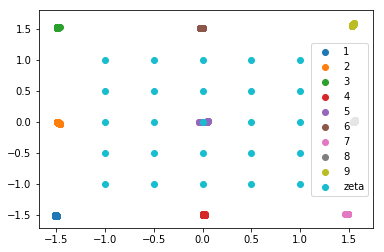

In [126]:
plt.scatter(som[0].y_k[:,0],som[0].y_k[:,1], label="1")
#plt.scatter(som[0].X[:,0],som[0].X[:,1], label="x1")
plt.scatter(som[1].y_k[:,0],som[1].y_k[:,1], label="2")
#plt.scatter(som[1].X[:,0],som[1].X[:,1], label="x1")
plt.scatter(som[2].y_k[:,0],som[2].y_k[:,1], label="3")
#plt.scatter(som[2].X[:,0],som[2].X[:,1], label="x1")
plt.scatter(som[3].y_k[:,0],som[3].y_k[:,1], label="4")
#plt.scatter(som[3].X[:,0],som[3].X[:,1], label="x1")
plt.scatter(som[4].y_k[:,0],som[4].y_k[:,1], label="5")
#plt.scatter(som[4].X[:,0],som[4].X[:,1], label="x1")
plt.scatter(som[5].y_k[:,0],som[5].y_k[:,1], label="6")
#plt.scatter(som[5].X[:,0],som[5].X[:,1], label="x1")
plt.scatter(som[6].y_k[:,0],som[6].y_k[:,1], label="7")
#plt.scatter(som[6].X[:,0],som[6].X[:,1], label="x1")
plt.scatter(som[7].y_k[:,0],som[7].y_k[:,1], label="8")
#plt.scatter(som[7].X[:,0],som[7].X[:,1], label="x1")
plt.scatter(som[8].y_k[:,0],som[8].y_k[:,1], label="9")
#plt.scatter(som[8].X[:,0],som[8].X[:,1], label="x1")
#plt.scatter(som_p.y_k[:,0],som_p.y_k[:,1], label="p")
plt.scatter(som_p.zeta[:,0],som_p.zeta[:,1], label="zeta")
plt.legend()
plt.show()

In [68]:
file = 1
D = 2
som = []
v = []

for file_num in range(file):
    file_name = "data" + str(file_num + 1) + ".txt"
    X = np.loadtxt(file_name)
    som.append(SOM())
    som[file_num].initialize(X)

In [69]:
for file_num in range(file):   
    som[file_num].fit(10)
    #k_size = np.size(ch_som ,axis=0)
    ch_som = som[file_num].y_k
    #ch_som.flatten()
    v.append(ch_som.flatten())
    print("CH_SOM"+str(file_num+1))

400
[1.         0.981      0.94376    0.8901344  0.82292365 0.74563128
 0.66215553 0.57645376 0.49222115 0.41262135]
CH_SOM1


In [45]:
som[0].zeta

array([[-1.        ,  1.        ],
       [-0.77777778,  1.        ],
       [-0.55555556,  1.        ],
       [-0.33333333,  1.        ],
       [-0.11111111,  1.        ],
       [ 0.11111111,  1.        ],
       [ 0.33333333,  1.        ],
       [ 0.55555556,  1.        ],
       [ 0.77777778,  1.        ],
       [ 1.        ,  1.        ],
       [-1.        ,  0.77777778],
       [-0.77777778,  0.77777778],
       [-0.55555556,  0.77777778],
       [-0.33333333,  0.77777778],
       [-0.11111111,  0.77777778],
       [ 0.11111111,  0.77777778],
       [ 0.33333333,  0.77777778],
       [ 0.55555556,  0.77777778],
       [ 0.77777778,  0.77777778],
       [ 1.        ,  0.77777778],
       [-1.        ,  0.55555556],
       [-0.77777778,  0.55555556],
       [-0.55555556,  0.55555556],
       [-0.33333333,  0.55555556],
       [-0.11111111,  0.55555556],
       [ 0.11111111,  0.55555556],
       [ 0.33333333,  0.55555556],
       [ 0.55555556,  0.55555556],
       [ 0.77777778,

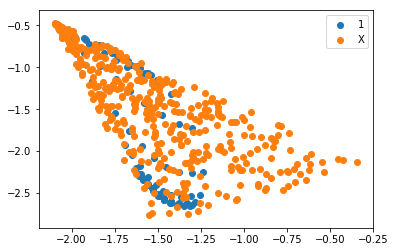

In [70]:
plt.scatter(som[0].y_k[:,0],som[0].y_k[:,1], label="1")
plt.scatter(som[0].X[:,0],som[0].X[:,1], label="X")
#plt.scatter(som[0].zeta[:,0],som[0].zeta[:,1], label="zeta")
plt.legend()
plt.show()